In [6]:
#python warning off
import warnings
warnings.filterwarnings('ignore')

# #tensorflow warning offa
# import tensorflow as tf
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("2016_middle_shcool_graduates_report.xlsx")  # df; data frame
df

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,강남구,국립국악중학교,9,국립,주간,9,91,0.060,0.000,...,0.000,0.940,0.000,0.000,0.000,0.000,0,0.000,37.476381,127.051355
411,411,금천구,국립전통예술중학교,9,국립,주간,14,42,0.107,0.000,...,0.000,0.875,0.000,0.000,0.000,0.000,0,0.018,37.446354,126.906424
412,412,광진구,선화예술학교,9,사립,주간,33,241,0.102,0.000,...,0.000,0.861,0.000,0.000,0.000,0.000,0,0.036,37.549642,127.087737
413,413,중구,예원학교,9,사립,주간,31,258,0.170,0.000,...,0.000,0.751,0.000,0.000,0.000,0.048,0,0.031,37.566951,126.971553


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
Unnamed: 0    415 non-null int64
지역            415 non-null object
학교명           415 non-null object
코드            415 non-null int64
유형            415 non-null object
주야            415 non-null object
남학생수          415 non-null int64
여학생수          415 non-null int64
일반고           415 non-null float64
특성화고          415 non-null float64
과학고           415 non-null float64
외고_국제고        415 non-null float64
예고_체고         415 non-null float64
마이스터고         415 non-null float64
자사고           415 non-null float64
자공고           415 non-null float64
기타진학          415 non-null float64
취업            415 non-null int64
미상            415 non-null float64
위도            415 non-null float64
경도            415 non-null float64
dtypes: float64(12), int64(5), object(4)
memory usage: 68.2+ KB


In [9]:
df.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [12]:
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family = 'Malgun Gothic')
elif platform.system() == 'Darwin':  #Mac OS
    matplotlib.rc('font', family = 'AppleGothic')
elif platform.system() == 'Linux':  #Linux
    matplotlib.rc('font', family = 'NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False  # minus 기호 깨짐 방지

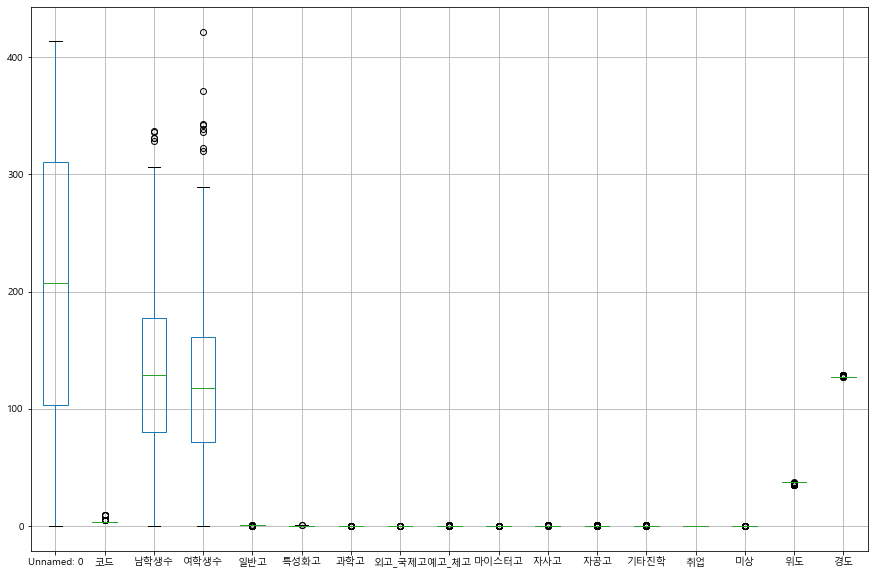

In [14]:
plt.figure(figsize = (15, 10))
df.boxplot()

In [18]:
df['남학생수'].value_counts()

0      45
167     7
123     6
172     5
9       5
       ..
190     1
189     1
119     1
120     1
337     1
Name: 남학생수, Length: 185, dtype: int64

In [19]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
df['남학생수'].value_countscounts().plot.pie(explode = [0, 0.05], autopct = "%.3f%%"), ax = ax[0]
sns.countplotplot('남학생수', data = df, ax = ax[1])

SyntaxError: can't assign to function call (<ipython-input-19-478a6cb4ca81>, line 2)